
<div style="text-align:center;">
<span style="color:blue; font-family:Arial; font-size:40px;">Stock Price Prediction</span>
</div>

### Data Collection

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

#####  Load Dataset

In [2]:
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


#### Convert the 'Date' column to a datetime object

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

#### Plot the stock price data

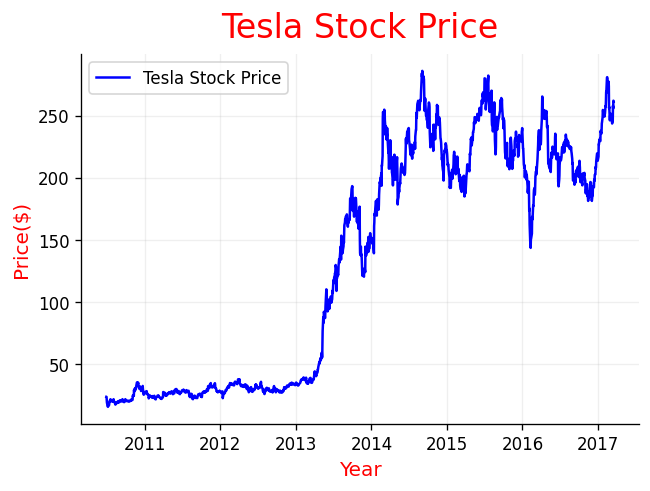

In [5]:
fig,ax = plt.subplots(figsize=(6,4), dpi=120)
ax.plot_date(data['Date'],data['Close'],label='Tesla Stock Price',fmt='b-')
ax.set_title('Tesla Stock Price',pad = 10, color='red', size = 20)
ax.set_xlabel('Year',color='red',size=12)
ax.set_ylabel('Price($)',color='red', size=12)
ax.grid(alpha=0.2)
ax.legend()
ax.spines[['right','top']].set_visible(False)
plt.show()

## Preprocess the data

In [6]:
data = data['Close'].values.reshape(-1, 1)

In [7]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

### create sequences of data

In [8]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((seq, target))
    return sequences


###  Set the length of the sequences and split the data

In [9]:
sequence_length = 10
sequences = create_sequences(data_scaled, sequence_length)

### Split the data into train and test sets

In [10]:
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))
train_sequences = sequences[:split_index]
test_sequences = sequences[split_index:]

### Convert the sequences into numpy arrays

In [11]:
X_train, y_train = np.array([seq for seq, target in train_sequences]), np.array([target for seq, target in train_sequences])
X_test, y_test = np.array([seq for seq, target in test_sequences]), np.array([target for seq, target in test_sequences])

### Build the LSTM model

In [12]:
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
43/43 [==============================] - 2s 7ms/step - loss: 0.0657
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 8/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 9/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 10/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 11/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 12/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 13/50
43/43 [==============================

### Evaluate the model

In [14]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.0005925508448854089
Testing Loss: 0.000945720006711781


### Make predictions

In [15]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

11/11 [==============================] - 0s 2ms/step


### Calculate additional evaluation metrics

In [16]:
mae_test = mean_absolute_error(actual_prices, predicted_prices)
rmse_test = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f'MAE Test: {mae_test}')
print(f'RMSE Test: {rmse_test}')

MAE Test: 6.340877318533244
RMSE Test: 8.31057213195339


## Plot the results

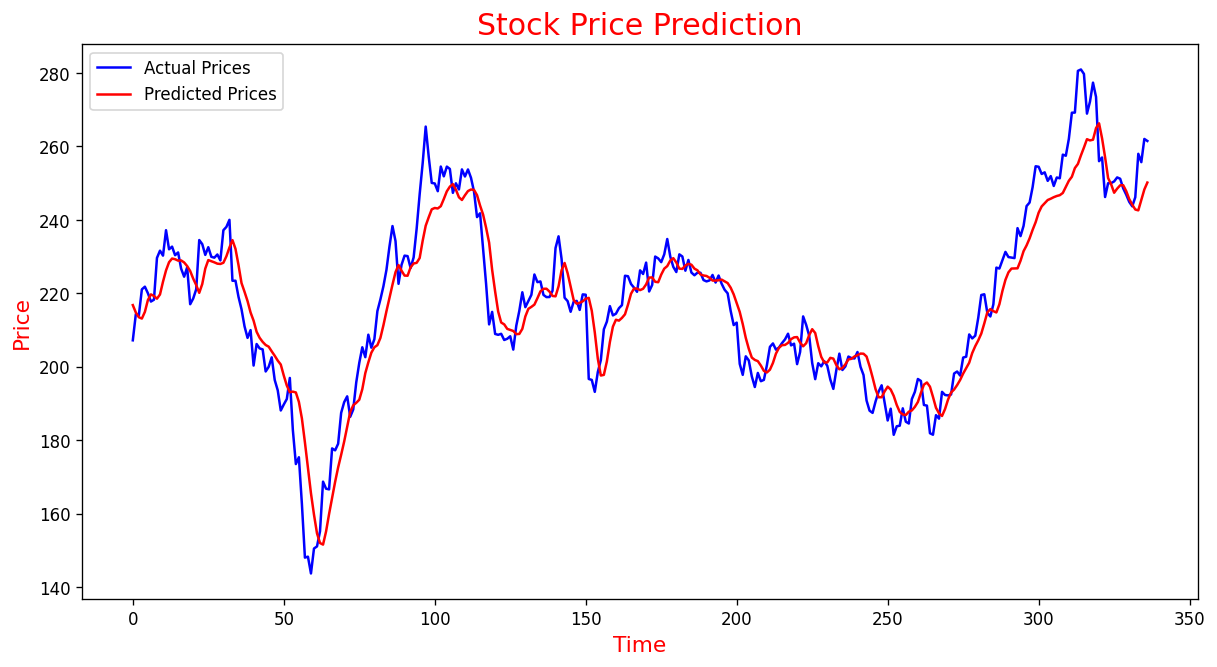

In [17]:
plt.figure(figsize=(12, 6), dpi=120)
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.legend()
plt.title('Stock Price Prediction', color='red', fontsize=18)
plt.xlabel('Time', fontsize=13, color='red')
plt.ylabel('Price', fontsize=13, color='red')
plt.show()